## Why automate your work flow, and how to approach the process

**Questions for students to consider:**

1) In the data exploration section you made some plots from your data. What if you want to look at other relationships? 

2) Are there computational processes you do often? How do you implement these? 

3) Do you have a clear workflow you could replicate from data to conclusions?

4) Could you plug this new data set into your old workflow? 

## Level of Python / Jupyter Automation

1. __Good__ - Documenting all analysis steps in enough details that will enable them to be reproduced successfully.
2. __Better__ - Script your analysis
3. __Best__ - Script your analysis and write tests to validate each step.

### Key takehomes
    - Code is read much more often that it is written
    - You are NEVER finshed with an analysis (drafts, reviewer comments, new data etc.) 
         Make your own future life easy!
    - Repeating yourself creates opportunity for mistakes/divergence

## Learning Objectives of Automation Module:

### [Lesson 1](#lesson-1) 
- Employ best practices of naming a variable including: don’t use existing function names, avoid periods in names, don’t use numbers at the beginning of a variable name.
- Defensive programming: catch errors instead of just fixing them.

### [Lesson 2](#lesson-2) 
- Define "Don't Repeat Yourself" (DRY) and provide examples of how you would implement DRY in your code
- Identify code that can be modularized following DRY and implement a modular workflow using functions.

### [Lesson 3](#lesson-3) 
- Know how to construct a function: variables, function name, syntax, documentation, return values
- Demonstrate use of function within the notebook / code. 
- Construct and compose function documentation that clearly defines inputs, output variables and behaviour.



__Basic Overview of the suggested workflow using Socrative (Optional)__

- Use Socrative quiz to collect answers from student activities (students can run their code in their notebooks, and post to socrative). This will allow the instructor to see what solutions students came up with, and identify any places where misconceptions and confusion are coming up. Using Socrative quizes also allows for a record of the student work to be analyzed after class to see how students are learning and where they are having troubles.
- sharing of prepared Socrative Quizes designed to be used with the automation module can be shared by URL links to each teacher so they do not have to be remade.

---

### Setup

__Please download the cleaned data file:__

https://raw.githubusercontent.com/Reproducible-Science-Curriculum/automation-RR-Jupyter/gh-pages/notebooks/gapminder_cleaned.csv

---

# Lesson 1 <a id="lesson-1"></a>
---

Lets begin by creating a new Jupyter notebook.

__Question:__ 

- Accounding to the organization we setup where should we put this notebook?

## Review of good variable practices
**Learning Objective: ** Employ best practices of naming a variable including: don’t use existing function names, avoid periods in names, don’t use numbers at the beginning of a variable name

### Types of variables:
- strings, integers, etc..

References:
- PEP8 - Style Guide for Python Code  - https://www.python.org/dev/peps/pep-0008/ 
- https://www.tutorialspoint.com/python3/python_variable_types.htm

### Keep in mind that code is read many more times then it is written!

## Other useful conventions with variables to follow
1. Set-up variables at the begining of your page, after importing libraries
2. use variables instead of file names, or exact values or strings so that if you need to change the value of something you don't have to search through all your code to make sure you made the change everywhere, simply change the value of the variable at the top. -- This will also make your code more reproducible in the end. 

## Let's Get Started

To get started we will import the python modules that we will use in the session. These modules are developed by programmers and made available as open source packages for python. We would normally have to install each of these ourself but they are included as part of the [Anaconda Python Distribution](https://www.continuum.io/downloads).

The _%matplotlib inline_ statement is part of the Jupyter and IPython magic that enables plaots generated by the matplotlib package to be discplayed as output in the Jupyter Notebook instead of open in a separate window.

In [4]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

We will continue where the _data exploration_ module left off but importing the cleaned gapminder dataset and setting it equal to a new varaible named __df__ to denote that we have imported a _pandas_ dataframe.

As validation that we have imported the data we will also look at the top five rows of data using the _head_ method of pandas.

# Defensive programming

In [5]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

## Whooops! That doesn't look great. and we know that the file *does* exist. We just downloaded it!
Lets do some defensive programming to prevent things from breaking

Your most common collaborator is YOU, in the future. Including error handling and messages help your colleagues and students, but most importantly, YOU.


## Catching errors using try-except
try and except statements are  a good way to catch and deal with errors in a convenient way

In [6]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
try:
        df = pd.read_csv(cleaned_data_location)
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)

Couldn't find data file, check path? You tried data/gapminder_cleaned.csv


Exercise: what do you need to fix to actually open that data file?

In [11]:
cleaned_data_location = '../data/gapminder_cleaned.csv'
try:
        df = pd.read_csv(cleaned_data_location)
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)

We can set a flag at the top of our script to dynamically set how much infomation we want to see.
e.g. VERBOSE

In [14]:
VERBOSE = 1

In [79]:
try:
        df = pd.read_csv(cleaned_data_location)
        if VERBOSE:
            print(df.head())
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)


# using assert statements to be explicit about assumptions
assert will fail if statement isn't true. Nothing will happen if it is true

In [ ]:
years = df['year'].unique()
years.sort()
assert years[-1]==2007 #Check that the most recent year is as expected


# Lesson 2 (10-15 min)<a id="lesson-2"></a>
---

__Learning Objectives__
- Define "Don't Repeat Yourself" (DRY) and provide examples of how you would implement DRY in your code
- Identify code that can be modularized following DRY and implement a modular workflow using functions.

As you write software there comes a time when you are going to encounter a situation where you want to do the same analysis step as you have already done in your analysis. Our natural tendancy is the copy the code that we wrote and paste it into teh new location for reuse.  Sounds easy, right. Copy, paste, move on...not so fast.

What happens if there is a problem with the code or you decide to tweak it, just a little, to change a format or enahce it?

You wil have to change the code in every place you ahve copied it. How do you know if you got _all_ of the copies? What happens if one of the copies is _not_ changed?

These examples illustrate the principle of "Don't Repeat Yourself". We are going to look at how to __refactor__ our code and pull pieces out by making them functions. They we will __call__ the function everytime we want to use that code.

# What if we want to ask questions about variables over time?
## Lets start with mean life expectancy in Asia

In [ ]:
#decide on a year, and calculate the statistic of interest
## do it point by point!! DON'T RUSH

mask_asia = df['continent'] == 'asia'
df_asia = df[mask_continent]

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]

value = np.mean(df_1952['lifeexp'])

result = []
result.append(('asia', '1952', value))
    
# Turn the summary into a dataframe so that we can visualize easily
result = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])


In [ ]:
result

In [ ]:
# Use a for loop to Loop through years and calculate the statistic of interest

mask_continent = df['continent'] == 'asia'
df_continent = df[mask_continent]

years = df_continent['year'].unique()
summary = []

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))
    
# Turn the summary into a dataframe so that we can visualize easily
summary = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])

In [ ]:
summary

# But now your PI wants that information all the years for a different continent!

## Activity: How could we use variables to make it easier to re-run this for differnet continents?

In [ ]:
# Define which continent / category we will use
category = 'lifeexp'
continent = 'asia'

# Create a mask that selects the continent of choice
mask_continent = df['continent'] == 'asia'
df_continent = df[mask_continent]

# Loop through years and calculate the statistic of interest
years = df_continent['year'].unique()
summary = []

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))
    
# Turn the summary into a dataframe so that we can visualize easily
summary = pd.DataFrame(summary, columns=['continent', 'year', category])

In [ ]:
summary.plot.line('year', category, label = "life expectancy")

# Lesson 3 <a id="lesson-3"></a>
## Building functions
---

__Learning Objectives__
- Know how to construct a function: variables, function name, syntax, documentation, return values
- Demonstrate use of function within the notebook / code.
- Construct and compose function documentation that clearly defines inputs, output 

In [ ]:
def calculate_mean_over_time(data, category, continent):
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        if VERBOSE:
            print(year)
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = np.mean(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [ ]:
VERBOSE = 0
calculate_mean_over_time(df, "lifeexp", "asia")

# Activity:
    How would you make a function to calculate the median through time?
    (Hint: focus on DRY.)

In [ ]:
def calculate_statistic_over_time(data, category, continent, func):
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [ ]:
calculate_statistic_over_time(df, "lifeexp", "asia", np.median)

In [ ]:
def calculate_statistic_over_time(data, category, continent, func):
    """calculate values of a statistic through time

    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of the continent column of that data frame (e.g. 'asia')
        func: the funtion to apply to data values (e.g. np.mean)
        
    Returns:
        a summary table of value per year.

    """
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

# Defensive programming activity
How would you check to make sure input values are reasonable?
Use assertions or try-except statements, and add options with the VERBOSE flag

In [ ]:
def calculate_statistic_over_time(data, category, continent, func):
    """calculate values of a statistic through time

    Args:
        data: a pandas data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of the continent column of that data frame (e.g. 'asia')
        func: the funtion to apply to data values (e.g. np.mean)
        
    Returns:
        a summary table of value per year.

    """
    
    # Check values
    assert category in data.columns.values
    assert 'continent' in data.columns.values
    assert continent in data['continent'].unique()
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]
    
    
    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    if VERBOSE:
        print("years include", years)
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [ ]:
VERBOSE = 1
calculate_statistic_over_time(df, "lifeexp", "asia", np.median)

In [ ]:
help(calculate_statistic_over_time)

NameError: name 'calculate_statistic_over_time' is not defined

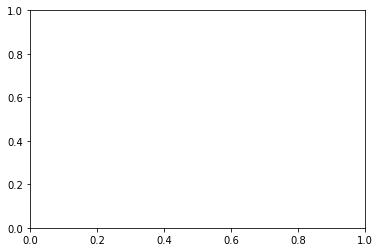

In [78]:
#use this function to plot life expectancy| through time
continents = df['continent'].unique()
VERBOSE=0
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df,"lifeexp", continent, np.median)
    output.plot.line('year', "lifeexp", ax=ax, label=continent)

In [60]:
# Answer to task from yesterday
summary = []
max_change = 0
max_country = None
for country in df['country'].unique():
    mask_country = df['country'] == country
    data_country = df[mask_country]
    min_year = min(data_country['year'])
    pop_first = int(data_country.loc[data_country['year'] == min_year]['pop'])
    max_year = max(data_country['year'])
    pop_last = int(data_country.loc[data_country['year'] == max_year]['pop'])
    relative_pop_change = (pop_last-pop_first)/pop_first
    summary.append((country, min_year, pop_first, max_year, pop_last, relative_pop_change))
    if relative_pop_change > max_change:
        max_change = relative_pop_change
        max_country = country
        
print(max_country)

kuwait


In [62]:
df_summary = pd.DataFrame.from_records(summary, columns=['country', 'year_min', 'pop_first', 'year_max', 'pop_second', 'rel_change'])

In [67]:
df_summary.sort_values(by=['rel_change'], ascending=False,)

,country,year_min,pop_first,year_max,pop_second,rel_change
71,kuwait,1952,160000,2007,2505559,14.659744
67,jordan,1952,607914,2007,6053193,8.957318
35,djibouti,1952,63149,2007,496374,6.860362
109,saudi arabia,1952,4005677,2007,27601038,5.890480
96,oman,1952,507833,2007,3204897,5.310927
30,cote d'ivoire,1952,2977019,2007,18013409,5.050821
46,gambia,1952,284320,2007,1688359,4.938235
75,libya,1952,1019729,2007,6036914,4.920116
7,bahrain,1952,120447,2007,708573,4.882861
68,kenya,1952,6464046,2007,35610177,4.508961


In [77]:
df_summary.loc[df_summary['rel_change']==max(df_summary['rel_change'])]

,country,year_min,pop_first,year_max,pop_second,rel_change
71,kuwait,1952,160000,2007,2505559,14.659744
